# **NASDAQ Daily Rate of Change Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Get NASDAQ Index data

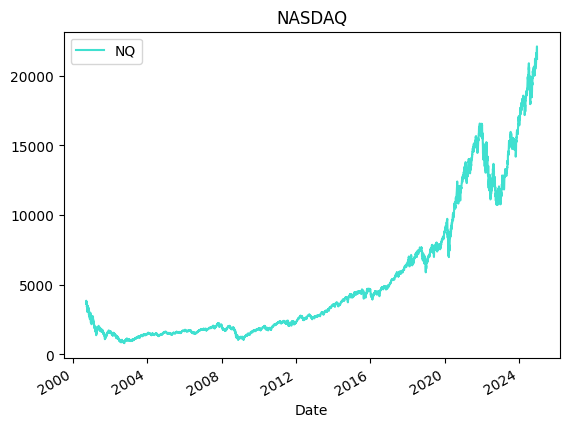

In [2]:
tickerData_nq = yf.Ticker('NQ=F')
data_nq = tickerData_nq.history(period='1d', start='2000-1-1', end='2024-12-19')
data_nq['Close'].plot(color = 'turquoise', label = 'NQ')
plt.title('NASDAQ')
plt.legend()
plt.show()

# Get VIX data

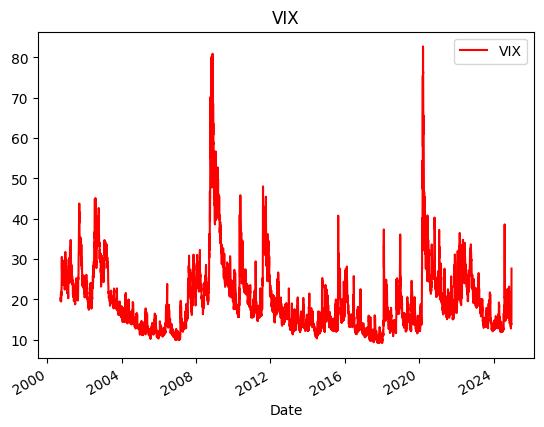

In [3]:
tickerData_vix = yf.Ticker('^VIX')
data_vix = tickerData_vix.history(period='1d', start='2000-09-18', end='2024-12-19')
data_vix['Close'].plot(color = 'red', label = 'VIX')
plt.title('VIX')
plt.legend()
plt.show()

# **Pre-proccessing and preparing data**

In [4]:
data_nq = data_nq.dropna()
data_nq = data_nq.drop(columns= ['Dividends', 'Stock Splits'])
data_nq

,Open,High,Low,Close,Volume
Date,,,,,
2000-09-18 00:00:00-04:00,3721.00,3785.50,3602.00,3653.50,72994
2000-09-19 00:00:00-04:00,3658.50,3817.00,3656.00,3804.00,70029
2000-09-20 00:00:00-04:00,3801.50,3874.00,3715.50,3853.00,78832
2000-09-21 00:00:00-04:00,3852.00,3874.00,3744.00,3765.00,70719
2000-09-22 00:00:00-04:00,3673.00,3780.00,3615.00,3776.00,55926
...,...,...,...,...,...
2024-12-12 00:00:00-05:00,21756.75,21772.50,21604.25,21651.25,510307
2024-12-13 00:00:00-05:00,21720.75,21908.00,21666.50,21795.75,639403
2024-12-16 00:00:00-05:00,21780.25,22152.50,21762.00,22110.25,482433


In [5]:
data_vix = data_vix.rename(columns = {'Close': 'VIX Close'})
data_vix = data_vix.drop(columns= ['Open', 'High', 'Low', 'Volume','Dividends', 'Stock Splits'])
data_vix

,VIX Close
Date,
2000-09-18 00:00:00-05:00,20.250000
2000-09-19 00:00:00-05:00,19.540001
2000-09-20 00:00:00-05:00,19.930000
2000-09-21 00:00:00-05:00,20.180000
2000-09-22 00:00:00-05:00,20.740000
...,...
2024-12-12 00:00:00-06:00,13.920000
2024-12-13 00:00:00-06:00,13.810000
2024-12-16 00:00:00-06:00,14.690000


# Calculation of the 100 MA (100 period Simple Moving Average)

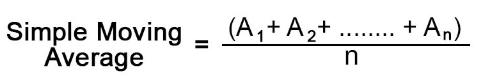

In [6]:
data_nq['SMA100'] = data_nq['Close'].rolling(window = 100).mean()
data_nq['SMA100'].fillna(0, inplace = True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18604\2865722766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_nq['SMA100'].fillna(0, inplace = True)


# Calculation of the RSI (14 periods)

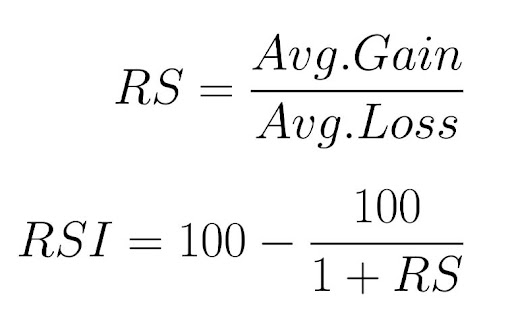

In [7]:
# Function to calculate RSI

def RSI(data_nq, period): 
    delta = data_nq['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    average_gain = gain.rolling(window = period).mean()
    average_loss = loss.rolling(window = period).mean()

    RS = average_gain / average_loss

    RSI_Calc = 100 - (100 / (1 + RS))

    return RSI_Calc

# Call the function to the 14 period RSI

data_nq['RSI'] = RSI(data_nq, 14)

In [8]:
data_nq['RSI'].fillna(0, inplace = True)
data_nq

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18604\3127924873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_nq['RSI'].fillna(0, inplace = True)


,Open,High,Low,Close,Volume,SMA100,RSI
Date,,,,,,,
2000-09-18 00:00:00-04:00,3721.00,3785.50,3602.00,3653.50,72994,0.000000,0.000000
2000-09-19 00:00:00-04:00,3658.50,3817.00,3656.00,3804.00,70029,0.000000,0.000000
2000-09-20 00:00:00-04:00,3801.50,3874.00,3715.50,3853.00,78832,0.000000,0.000000
2000-09-21 00:00:00-04:00,3852.00,3874.00,3744.00,3765.00,70719,0.000000,0.000000
2000-09-22 00:00:00-04:00,3673.00,3780.00,3615.00,3776.00,55926,0.000000,0.000000
...,...,...,...,...,...,...,...
2024-12-12 00:00:00-05:00,21756.75,21772.50,21604.25,21651.25,510307,20048.355098,69.595803
2024-12-13 00:00:00-05:00,21720.75,21908.00,21666.50,21795.75,639403,20074.280098,71.296713
2024-12-16 00:00:00-05:00,21780.25,22152.50,21762.00,22110.25,482433,20105.460098,74.550898


# Calculation of the VWAP (Volume-Weighted Average Price)

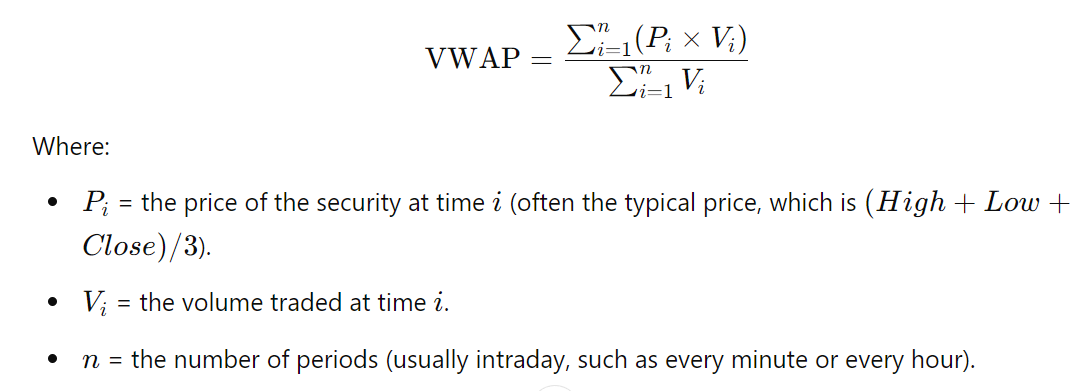

In [9]:
# Function to calculate VWAP 

def VWAP(data_nq):
    typical_price = (data_nq['Close'] + data_nq['High'] + data_nq['Low'])/3
    total_price = typical_price * data_nq['Volume']

    vwap_calc = total_price / data_nq['Volume']

    return vwap_calc

# Call the function to calculate VWAP

data_nq['VWAP'] = VWAP(data_nq)

In [10]:
# Count zeros in columns

data_nq.isin([0]).sum()

Open       0
High       0
Low        0
Close      0
Volume     5
SMA100    99
RSI       13
VWAP       0
dtype: int64

# Merge both Time Series

In [11]:
# Reset index 

data_nq = data_nq.reset_index()
data_vix = data_vix.reset_index()

In [12]:
# Convert date to datetime format   

data_nq["Date"] = pd.to_datetime(data_nq["Date"]).dt.tz_localize(None)
data_vix["Date"] = pd.to_datetime(data_vix["Date"]).dt.tz_localize(None)

# Drop duplicates

data_nq = data_nq.drop_duplicates(subset="Date")
data_vix = data_vix.drop_duplicates(subset="Date")

In [13]:
# Merge dataframes

data = pd.merge(data_nq, data_vix, on = 'Date', how = 'inner')
data

,Date,Open,High,Low,Close,Volume,SMA100,RSI,VWAP,VIX Close
0,2000-09-18,3721.00,3785.50,3602.00,3653.50,72994,0.000000,0.000000,3680.333333,20.250000
1,2000-09-19,3658.50,3817.00,3656.00,3804.00,70029,0.000000,0.000000,3759.000000,19.540001
2,2000-09-20,3801.50,3874.00,3715.50,3853.00,78832,0.000000,0.000000,3814.166667,19.930000
3,2000-09-21,3852.00,3874.00,3744.00,3765.00,70719,0.000000,0.000000,3794.333333,20.180000
4,2000-09-22,3673.00,3780.00,3615.00,3776.00,55926,0.000000,0.000000,3723.666667,20.740000
...,...,...,...,...,...,...,...,...,...,...
6095,2024-12-12,21756.75,21772.50,21604.25,21651.25,510307,20048.355098,69.595803,21676.000000,13.920000
6096,2024-12-13,21720.75,21908.00,21666.50,21795.75,639403,20074.280098,71.296713,21790.083333,13.810000
6097,2024-12-16,21780.25,22152.50,21762.00,22110.25,482433,20105.460098,74.550898,22008.250000,14.690000
6098,2024-12-17,22115.00,22124.50,21942.25,22014.75,277298,20133.862598,70.529701,22027.166667,15.870000


In [15]:
# Drop columns

data = data.drop(columns = ['Date', 'Open', 'High', 'Low'])
data

,Close,Volume,SMA100,RSI,VWAP,VIX Close
0,3653.50,72994,0.000000,0.000000,3680.333333,20.250000
1,3804.00,70029,0.000000,0.000000,3759.000000,19.540001
2,3853.00,78832,0.000000,0.000000,3814.166667,19.930000
3,3765.00,70719,0.000000,0.000000,3794.333333,20.180000
4,3776.00,55926,0.000000,0.000000,3723.666667,20.740000
...,...,...,...,...,...,...
6095,21651.25,510307,20048.355098,69.595803,21676.000000,13.920000
6096,21795.75,639403,20074.280098,71.296713,21790.083333,13.810000
6097,22110.25,482433,20105.460098,74.550898,22008.250000,14.690000
6098,22014.75,277298,20133.862598,70.529701,22027.166667,15.870000
